<a href="https://colab.research.google.com/github/ynnn01/Data-Viz-/blob/ynnn01-patch-timo/TIMOCASES_16APR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phan Ngoc Yen Case Study for Timo


### Import Libraries & Create Visualize Function

In [ ]:
!pip install matplotlib-venn
!pip install dabl
!pip install mplcursors

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [7]:
import plotly.express as px

In [8]:
sns.set(style='darkgrid')

def get_label(g):
  for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{}'.format(round(height)),
            ha="center", color='black')

In [9]:
df = pd.read_csv("/content/drive/MyDrive/txn_history_dummysample.csv")

In [49]:
pd.options.display.float_format = '{:20,.2f}'.format

### I.Overview

In [11]:
df.head(5)

,account_id,date_of_birth,txn_ts,txn_amount,txn_type_code
0,ID000001,2000-01-12,2021-01-01 11:52:00,-42000,2
1,ID000001,2000-01-12,2021-01-01 13:01:00,-148000,2
2,ID000001,2000-01-12,2021-01-02 14:41:00,-1092000,1
3,ID000001,2000-01-12,2021-01-04 13:55:00,-197000,1
4,ID000001,2000-01-12,2021-01-04 14:50:00,-162000,1


I assume that the currency unit in the above dataset will be: VND

In [12]:
#checkfornullvalue
df.isnull().sum()

account_id       0
date_of_birth    0
txn_ts           0
txn_amount       0
txn_type_code    0
dtype: int64

In [13]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['txn_ts'] = pd.to_datetime(df['txn_ts'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200167 entries, 0 to 200166
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   account_id     200167 non-null  object        
 1   date_of_birth  200167 non-null  datetime64[ns]
 2   txn_ts         200167 non-null  datetime64[ns]
 3   txn_amount     200167 non-null  int64         
 4   txn_type_code  200167 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 7.6+ MB


#### 1. Descriptive Analysis

In [15]:
df.describe()

,date_of_birth,txn_ts,txn_amount,txn_type_code
count,200167,200167,"200,167.00","200,167.00"
mean,1994-09-27 07:21:57.777655808,2021-02-15 07:43:35.994414848,"435,797.55",1.65
min,1943-05-11 00:00:00,2021-01-01 08:36:00,"-1,358,349,000.00",1.00
25%,1992-01-01 00:00:00,2021-01-25 09:52:30,"-485,000.00",1.00
50%,1996-02-25 00:00:00,2021-02-13 08:00:00,"-55,000.00",1.00
75%,1999-04-26 00:00:00,2021-03-09 14:27:00,"140,000.00",2.00
max,2004-02-05 00:00:00,2021-04-01 00:31:00,"2,073,547,000.00",7.00
std,NaN,NaN,"19,507,071.96",1.17


In [16]:
df.describe(include=['object'])

,account_id
count,200167
unique,6847
top,ID005735
freq,723


In [17]:
df.median(skipna=False ,numeric_only=True)

txn_amount                -55,000.00
txn_type_code                   1.00
dtype: float64

From the first 5 records we can see that every account_id have multiple transactions with many types of transaction code, therefore from the first sight we can obtain the top account_id with the number of transactions and look through their cashflow, from the descriptive table for object variables, we know that ID005735 have the highest transactions amount

In [18]:
toptxn = df.groupby(['account_id']).count().apply(lambda x: x.sort_values(ascending=False).head(10)).reset_index(drop=False)
toptxn

,account_id,date_of_birth,txn_ts,txn_amount,txn_type_code
0,ID005735,723,723,723,723
1,ID006847,709,709,709,709
2,ID001878,698,698,698,698
3,ID005260,483,483,483,483
4,ID001326,452,452,452,452
5,ID001248,448,448,448,448
6,ID001079,435,435,435,435
7,ID006025,394,394,394,394
8,ID001147,384,384,384,384
9,ID001255,375,375,375,375


In [19]:
cashflow = df.groupby(['account_id']).agg({'txn_amount':'sum'}).apply(lambda x: x.sort_values(ascending=False)).reset_index(drop=False)
cashflow[cashflow.account_id.isin(toptxn['account_id'])]

,account_id,txn_amount
51,ID005260,309947000
261,ID001255,68336000
476,ID001326,33245000
847,ID001147,14995000
955,ID006847,12007000
6363,ID001878,-2217000
6516,ID005735,-5146000
6791,ID001079,-58316000
6803,ID001248,-67323000
6819,ID006025,-100213000


In [20]:
plotdata1 = df['txn_amount']
plotdata1 = plotdata1.to_frame().reset_index()

<Axes: xlabel='txn_amount', ylabel='Count'>

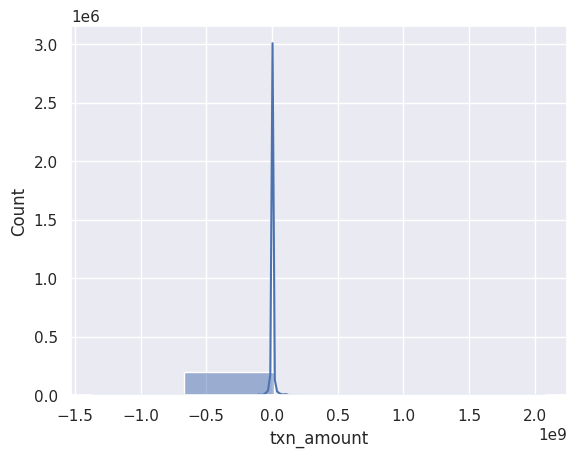

In [21]:
sns.histplot(data=plotdata1, x= 'txn_amount', bins=5, kde=True)

As we can see from the above chart we can see that the transaction amount is slightly shifted to the left side, this might be an idicatior of skewness. So, lets get its Pearson coefficient of skewness to see if it is positive skewed.

In [22]:
df['txn_amount'].skew()

12.611948246042806

I find the skewness to be 12.611. So, it is greater than 1. Hence, we can conclude that the txn_amount data is highly skewed, I consider the median a more robust measure for average value. From the above finding, I will calculate the average transaction size for every type of transaction code.

A Demo of a skewed distribution and its porportion

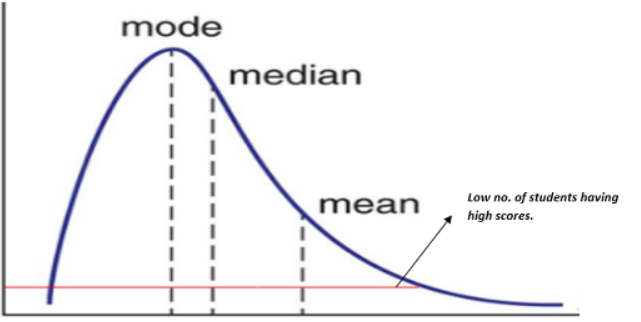

In [23]:
AVGticketsize = df.groupby('txn_type_code')['txn_amount'].median().to_frame().reset_index()
AVGticketsize

,txn_type_code,txn_amount
0,1,"-10,000.00"
1,2,"-500,000.00"
2,3,"510,000.00"
3,4,"46,000.00"
4,5,"-47,000.00"
5,6,"1,000.00"
6,7,"937,500.00"


In [62]:
df['txn_amount'].abs().min()

0

In [65]:
df.loc[df['txn_amount'] == 0].groupby('txn_type_code').count()

,account_id,date_of_birth,txn_ts,txn_amount,Generation
txn_type_code,,,,,
1,80,80,80,80,80


We can see that there are 80 observations have transaction value of 0 VND and belongs to txn_code_type 1, this might be the Auto Recurring Savings Account Contribution (money automatically pulled from savings account to
the customer’s current account based on e.g. monthly rule). Since the saving account balance might be = 0

In [79]:
df1 = []
df1 = df[['txn_type_code','txn_amount']]
df1['txn_amount']=df1['txn_amount'].abs()
df1['total'] = df1['txn_amount'].sum()
df1 = df1.groupby(['txn_type_code']).agg({'txn_amount':'sum','total':'max'}).reset_index()
df1['%Total'] = df1['txn_amount'] / df1['total']
df1

<ipython-input-79-7c1fffa4ee05>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-79-7c1fffa4ee05>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,txn_type_code,txn_amount,total,%Total
0,1,397541639000,668333666000,0.59
1,2,248297372000,668333666000,0.37
2,3,10577366000,668333666000,0.02
3,4,672471000,668333666000,0.00
4,5,196072000,668333666000,0.00
5,6,107352000,668333666000,0.00
6,7,10941394000,668333666000,0.02


####2. EDA

To get a better view of the customer of every account_id, and understand more about the demographic info of them, I will create a table contain of every generation where they are now adults and can have a bank account.

In [24]:
Gendata = {'Generation': ['The Greatest Generation',
'The Silent Generation',
'The Baby Boomer Generation',
'Generation X',
'Millennials',
'Generation Z']}
Gendata = pd.DataFrame(Gendata)
Gendata['Start'] = pd.DataFrame({"Start": pd.to_datetime(["1/1/1901","1/1/1928","1/1/1946","1/1/1965","1/1/1981","1/1/1996"])})
Gendata['End'] = pd.DataFrame({"End": pd.to_datetime(["31/12/1927","31/12/1945","31/12/1964","31/12/1980","31/12/1996","31/12/2012"])})

<ipython-input-24-50ce2c653cd9>:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Gendata['End'] = pd.DataFrame({"End": pd.to_datetime(["31/12/1927","31/12/1945","31/12/1964","31/12/1980","31/12/1996","31/12/2012"])})


In [25]:
Gendata

,Generation,Start,End
0,The Greatest Generation,1901-01-01,1927-12-31
1,The Silent Generation,1928-01-01,1945-12-31
2,The Baby Boomer Generation,1946-01-01,1964-12-31
3,Generation X,1965-01-01,1980-12-31
4,Millennials,1981-01-01,1996-12-31
5,Generation Z,1996-01-01,2012-12-31


Merging data with Generation name

In [26]:
generation_names = []

for _, row_a in df.iterrows():
  dob = row_a['date_of_birth']
  for _, row_b in Gendata.iterrows():
    start_date = pd.to_datetime(row_b['Start'])
    end_date = pd.to_datetime(row_b['End'])
    if start_date <= dob <= end_date:
      generation_names.append(row_b['Generation'])
      break
df['Generation']=generation_names
df.head()


,account_id,date_of_birth,txn_ts,txn_amount,txn_type_code,Generation
0,ID000001,2000-01-12,2021-01-01 11:52:00,-42000,2,Generation Z
1,ID000001,2000-01-12,2021-01-01 13:01:00,-148000,2,Generation Z
2,ID000001,2000-01-12,2021-01-02 14:41:00,-1092000,1,Generation Z
3,ID000001,2000-01-12,2021-01-04 13:55:00,-197000,1,Generation Z
4,ID000001,2000-01-12,2021-01-04 14:50:00,-162000,1,Generation Z


In [27]:
plotdata2 = df.groupby(['Generation']).nunique().reset_index()
plotdata2

,Generation,account_id,date_of_birth,txn_ts,txn_amount,txn_type_code
0,Generation X,345,332,5687,3369,7
1,Generation Z,3405,1809,56441,10056,7
2,Millennials,3012,2123,63094,21764,7
3,The Baby Boomer Generation,84,84,959,731,5
4,The Silent Generation,1,1,2,2,1


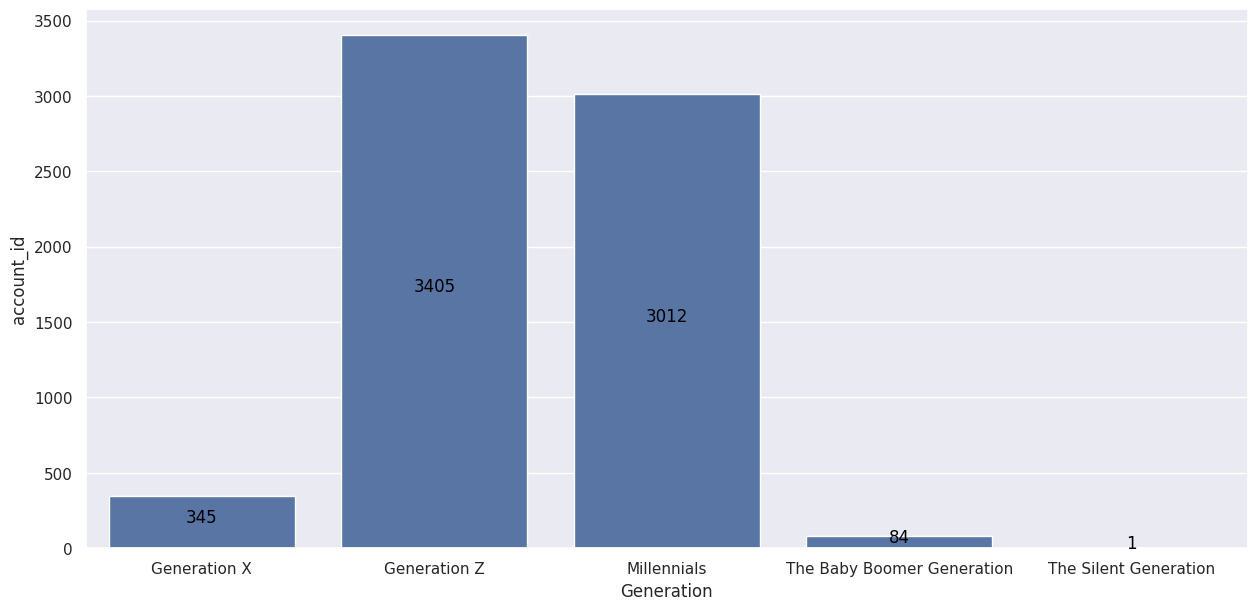

In [28]:
plt.figure(figsize=(15,7))
g = sns.barplot(data=plotdata2, x='Generation', y = 'account_id');
get_label(g)

In [29]:
df.loc[df['Generation'] == 'The Silent Generation']

,account_id,date_of_birth,txn_ts,txn_amount,txn_type_code,Generation
175180,ID006038,1943-05-11,2021-02-27 06:24:00,88671000,1,The Silent Generation
175181,ID006038,1943-05-11,2021-03-26 18:50:00,-553000,1,The Silent Generation


Surprisingly, in the dataset we have one customer from The Silent Generation, who is 81 now and 75 when the dataset is created in 2021. From the above conclusion, we now can look into the avagerage transaction of every Generation in this dataset

In [30]:
#AVGtxnGen = df.groupby('Generation')['txn_amount'].median().to_frame().reset_index()
#AVGtxnGen

In [31]:
plotdata3 = df[['txn_ts','account_id', 'txn_amount']]

In [ ]:
plotdata3['Year'] = plotdata3['txn_ts'].dt.year
plotdata3['Month'] = plotdata3['txn_ts'].dt.strftime('%b')
plotdata3['Quarter'] = plotdata3['Year'].astype(str) +'Q' + plotdata3['txn_ts'].dt.quarter.astype(str)

In [33]:
pivotQ = plotdata3.groupby(['Quarter']).count()
pivotmonth = plotdata3.groupby(['Month']).count().reset_index()

In [34]:
pivotamt = plotdata3.groupby(['Month']).agg({'txn_amount':'sum'}).reset_index()

In [35]:
cats = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pivotmonth['Month'] = pd.Categorical(pivotmonth['Month'], categories=cats, ordered=True)
pivotmonth = pivotmonth.sort_values(["Month"])
pivotamt['Month'] = pd.Categorical(pivotmonth['Month'], categories=cats, ordered=True)
pivotamt = pivotamt.sort_values(["Month"])

In [36]:
# Create charts
fig_quarter = px.line(pivotQ, x=pivotQ.index, y='account_id',
                     title='Transactions Trend by Quarter (Yearly)')
fig_month = px.line(pivotmonth, x=['Month'], y='account_id',
                   title='Transactions Trend by Month (Yearly)')

# Customize axes labels
fig_quarter.update_xaxes(title_text='Year')
fig_quarter.update_yaxes(title_text='Total Transactions')
fig_month.update_xaxes(title_text='Year')
fig_month.update_yaxes(title_text='Total Transactions')

# Show interactive plots
fig_quarter.show()
fig_month.show()


In [37]:
# Create charts
fig_monthly_amt = px.line(pivotamt, x=['Month'], y='txn_amount',
                   title='Transactions Trend by Month (Yearly)')

fig_monthly_amt.update_xaxes(title_text='Year')
fig_monthly_amt.update_yaxes(title_text='Total Transactions')

fig_monthly_amt.show()

Since we only have the data for all transaction until 01-APR-2021, therefore we can conclude that the number of transactions is quite stable through times and that mostly the transactions made in this period of times is sending and may be transaction code: 3 and 4 mightbe - Auto Recurring Savings Account Contribution (money automatically pulled from savings account to
the customer’s current account based on e.g. monthly rule) And Manual Savings Account Contribution (one-time contribution from a current to a savings account)

### Conclusion

After scrutinizing this dataset, I’ve unearthed a wealth of potential waiting to be harnessed. Notably, the main customer cohort appears to be Generation Z, a tech-savvy demographic that gravitates toward using SuperBank for money transfers. This revelation opens up exciting avenues for targeted marketing campaigns. However, I approach this opportunity with a measure of caution. The dataset, alas, is small and lacks statistical significance. While the trends are promising, further exploration and validation are imperative before we confidently chart our course.

In summary, these insights are very judiciously, keeping an eye on scalability and robustness. Although this dataset might have many potential to explore, I find this report uptil now, is enough to express my thoughts about it.